In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
data = pd.read_csv("benchmarks/log.log")

In [72]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [73]:
data = data[data.tag == "resnet_18_fmnist"]
data

,timestamp,event,version,tag
10,2023-09-07 16:29:22.958977,pickling start,0.0.4,resnet_18_fmnist
11,2023-09-07 16:29:23.097091,pickling finished,0.0.4,resnet_18_fmnist
12,2023-09-07 16:29:23.385353,sending job start,0.0.4,resnet_18_fmnist
13,2023-09-07 16:29:27.119243,sending job finished,0.0.4,resnet_18_fmnist
14,2023-09-07 16:29:27.625779,processing job started,0.0.4,resnet_18_fmnist
15,2023-09-07 16:35:24.958140,processing job finished,0.0.4,resnet_18_fmnist
16,2023-09-07 16:35:24.958802,retrieving weights from remote,0.0.4,resnet_18_fmnist
17,2023-09-07 16:35:26.975069,retrieving weights from remote finished,0.0.4,resnet_18_fmnist
18,2023-09-07 16:35:27.012170,loading weights finished,0.0.4,resnet_18_fmnist


In [74]:
df_merged = pd.concat([data, data.shift(-1).add_prefix("end_")], axis=1)
df_merged = df_merged.iloc[::2]
start = df_merged.iloc[0]["timestamp"]
df_merged["begin"] = (df_merged["timestamp"] - start).apply(lambda x: x.total_seconds())
df_merged["end"] = (df_merged["end_timestamp"] - start).apply(
    lambda x: x.total_seconds()
)
df_merged["event"] = df_merged["event"].apply(lambda x: " ".join(x.split(" ")[:-1]))
df_merged["duration"] = df_merged["end"] - df_merged["begin"]
df_merged.drop(
    columns=list(df_merged.filter(regex="end_")) + ["timestamp"], inplace=True
)

data = df_merged
data

,event,version,tag,begin,end,duration
10,pickling,0.0.4,resnet_18_fmnist,0.000000,0.138114,0.138114
12,sending job,0.0.4,resnet_18_fmnist,0.426376,4.160266,3.733890
14,processing job,0.0.4,resnet_18_fmnist,4.666802,361.999163,357.332361
16,retrieving weights from,0.0.4,resnet_18_fmnist,361.999825,364.016092,2.016267
18,loading weights,0.0.4,resnet_18_fmnist,364.053193,NaN,NaN


In [75]:
# plt.rcParams['image.cmap'] = "seaborn-v0_8-colorblind"
plt.style.use("seaborn-colorblind")

/tmp/ipykernel_8664/2548020364.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [84]:
overhead_abs = data[data["event"] != "processing job"].sum()["duration"]
overhead_rel = (
    data[data["event"] != "processing job"].sum()["duration"]
    / data[data["event"] == "processing job"]["duration"]
)
overhead_rel = overhead_rel.iloc[0]
overhead_abs, overhead_rel * 100

(5.888271000000028, 1.647841517494137)

In [ ]:
10/

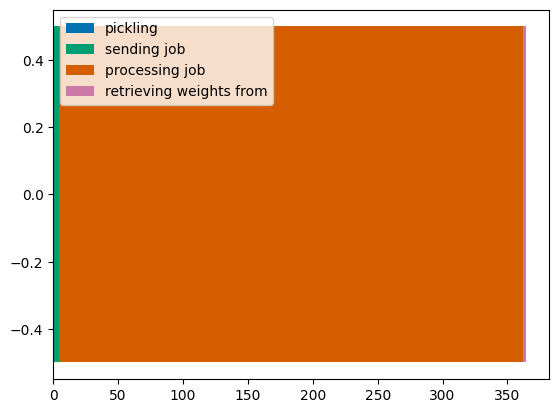

In [76]:
# plt.plot(data["timestamp"])
for index, row in data.iloc[:-1].iterrows():
    plt.barh(
        left=row["begin"], width=row["duration"], height=1, y=0, label=row["event"]
    )

plt.legend()

<Axes: >

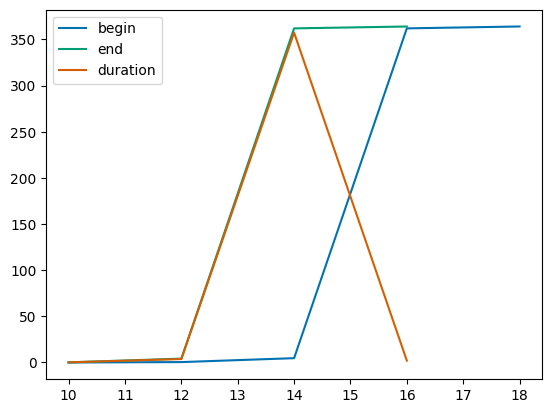

In [77]:
data.plot()